# **RBM**

*MCMC method is used for gibbs sampling*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gibbs_sampling(v, W , b, a, k):
    for _ in range(k):
        h_prob = sigmoid(np.dot(v, W) + b)
        h = np.random.binomial(1, h_prob)

        v_prob = sigmoid(np.dot(h, W.T) + a)
        v = np.random.binomial(1, v_prob)

    return v, h

Nh = 2
Nv = 5
Weight = np.random.randn(Nv, Nh)
hidden_bias = np.zeros(Nh)
visible_bias = np.zeros(Nv)
iteration = 1

v_sample = np.array([])
h_sample = np.array([])

for _ in range(100):
  v_init = np.random.binomial(1, 0.5, Nv)
  v_sampled, h_sampled = gibbs_sampling(v_init, Weight, hidden_bias, visible_bias, iteration)
  v_sample = np.append(v_sample, v_sampled)
  h_sample = np.append(h_sample, h_sampled)


print("Sampled visible state:", v_sample)
print("Sampled hidden state:", h_sample)

len(v_sample),len(h_sample)


Sampled visible state: [1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 1. 

(500, 200)

In [ ]:
def train_rbm(data, num_hidden, learning_rate, k, epochs):
    num_visible = data.shape[1]
    W = np.random.randn(num_visible, num_hidden)
    b = np.zeros(num_hidden)
    a = np.zeros(num_visible)

    for epoch in range(epochs):
        np.random.shuffle(data)
        for v in data:
            v_sample = np.copy(v)
            v_k, h_k = gibbs_sampling(v_sample, W, b, a, k)

            pos_associations = np.outer(v, sigmoid(np.dot(v, W) + b))
            neg_associations = np.outer(v_k, sigmoid(np.dot(v_k, W) + b))

            W += learning_rate * (pos_associations - neg_associations)
            a += learning_rate * (v - v_k)
            b += learning_rate * (sigmoid(np.dot(v, W) + b) - sigmoid(np.dot(v_k, W) + b))

    return W, b, a

In [ ]:
seed = 10
np.random.seed(seed)
data = np.random.binomial(1, 0.5, size=(1000, 10))
data

array([[1, 0, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [1, 1, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 1]])

In [ ]:
num_hidden = 5
learning_rate = 0.1
k = 1
epochs = 30
W, b, a = train_rbm(data, num_hidden, learning_rate, k, epochs)

print("Trained weights:")
print(W)
print("Trained visible biases:")
print(a)
print("Trained hidden biases:")
print(b)

Trained weights:
[[ 2.45713007e-01 -1.68277713e+00 -2.71815729e+00 -2.41639560e+00
  -1.13737647e+00]
 [ 1.22740298e+00 -1.27843270e+00 -1.25108181e+00 -3.12526998e+00
  -4.33906753e-01]
 [-5.19310276e-01 -9.65839002e-01 -9.70915774e-01 -9.44583828e-02
   6.27360176e-01]
 [-9.94093279e-01  1.95727567e-01 -1.08805600e+00 -1.94959325e+00
  -1.96911541e+00]
 [-6.95160917e-01 -5.10259173e-01  9.58903350e-01 -1.58549620e+00
  -2.75083886e+00]
 [-1.85451039e+00 -1.19769403e+00  2.50845817e-03 -1.75613822e+00
  -1.51837195e+00]
 [-1.65141236e+00  3.39135305e-01 -2.03102090e+00 -1.94661112e+00
   4.86918713e-01]
 [-2.04747802e+00 -1.05695262e+00 -9.30970767e-01 -4.73198287e-01
  -2.18691207e+00]
 [-1.84666408e+00 -1.87988454e+00 -3.39329815e-01 -1.50695728e-01
   4.44736587e-02]
 [-1.22402333e+00 -1.33641774e+00 -1.35895313e+00  1.46399634e-01
  -6.26665492e-01]]
Trained visible biases:
[3.  3.7 2.2 2.5 1.9 2.6 2.  2.1 1.4 0.8]
Trained hidden biases:
[-0.4592403  12.24339339 -0.12015885 14.967

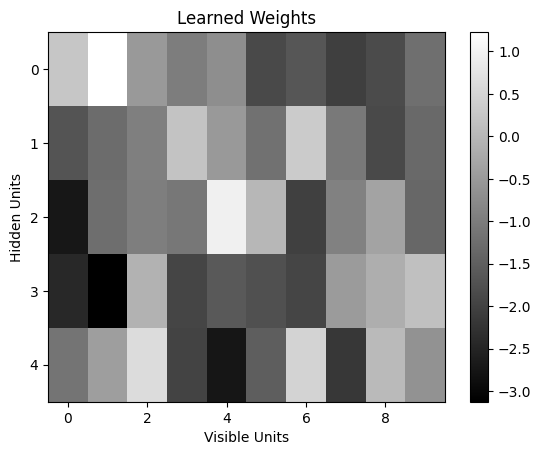

In [ ]:
plt.imshow(W.T, cmap='gray', aspect='auto')
plt.title('Learned Weights')
plt.xlabel('Visible Units')
plt.ylabel('Hidden Units')
plt.colorbar()
plt.show()